In [57]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
from math import e, pi
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit import transpile, assemble, Aer
from qiskit.visualization.bloch import Bloch

from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


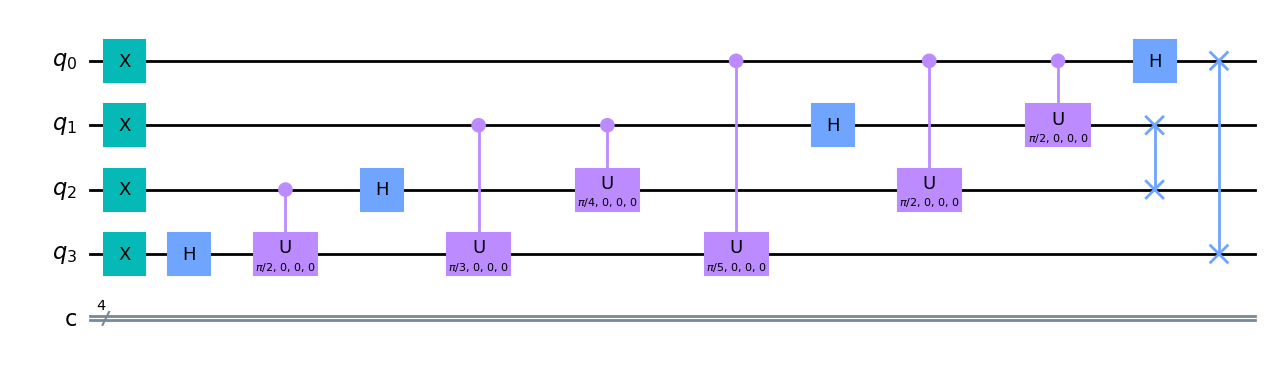

In [6]:
qc= QuantumCircuit(4,4)
qc.x(range(4))
qc.h(3)
qc.cu(np.pi/2,0,0,0,2,3)
qc.h(2)
qc.cu(np.pi/3,0,0,0,1,3)
qc.cu(np.pi/4,0,0,0,1,2)
qc.cu(np.pi/5,0,0,0,0,3)
qc.h(1)
qc.cu(np.pi/2,0,0,0,0,2)
qc.cu(np.pi/2,0,0,0,0,1)
qc.h(0)
qc.swap(1,2)
qc.swap(0,3)
qc.draw('mpl')

In [1]:
state = Statevector(qc)
plot_bloch_multivector(state)

NameError: name 'Statevector' is not defined

# Color space QFT

In [2]:
n = 200
k = 100

start = time.time()
x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=200000)
job = aer_sim.run(qobj)
result = job.result()
counts = result.get_counts()
counts

C:\Users\HCI\AppData\Local\Temp\ipykernel_8340\2336452204.py:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = aer_sim.run(qobj)


{'10': 90999, '00': 98270, '11': 8966, '01': 1765}

C:\Users\HCI\AppData\Local\Temp\ipykernel_8340\1224835838.py:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = aer_sim.run(qobj)


0.40108 s
[array([201.36527588, 100.92918952,   0.        ])]


C:\Users\HCI\AppData\Local\Temp\ipykernel_8340\1224835838.py:102: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(1,1,c=colors, marker='o')


Text(0, 0.5, 'Green')

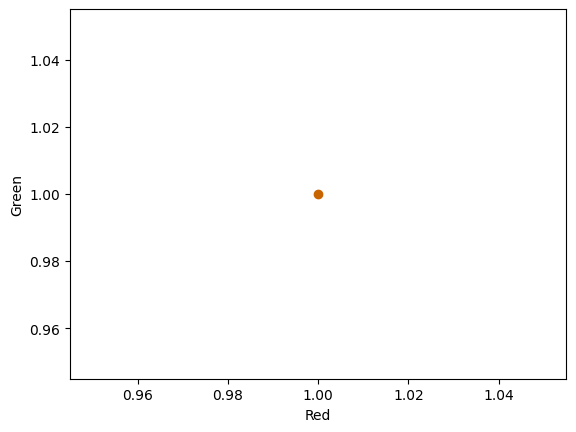

In [75]:
n = 200
k = 100

start = time.time()
x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=200000)
job = aer_sim.run(qobj)
result = job.result()
counts = result.get_counts()

pixel_color_theta_recon = []
pixel_color_phi_recon = []

pixel_color_theta = []
pixel_color_phi = []

for i in range(0, 1):
    for item in counts.items():
        key = item[0]
        amount = item[1]
        state = key[-1]
        decision = int(key[0])
        bin_coord = key[1:-1]

        if decision == 1:
            pixel_color_theta.append((state, amount))
        elif decision == 0:
            pixel_color_phi.append((state, amount))

# ======================== phi ====================================
total_phi_value = 0
for state in pixel_color_phi:
    state_value = state[1]
    total_phi_value += state_value

phi_state_0 = []
for phi, amount in pixel_color_phi:
    if not int(theta):
        phi_state_0.append((phi, amount))

for i in range(1):
    try:
        theta = np.arccos((phi_state_0[i][1]/total_phi_value)**(1/2))
        pixel_color_phi_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")
# ======================== theta ====================================

total_theta_value = 0
for state in pixel_color_theta:
    state_value = state[1]
    total_theta_value += state_value

theta_state_0 = []
for theta, amount in pixel_color_theta:
    if not int(theta):
        theta_state_0.append((theta, amount))

for i in range(1):
    try:
        theta = np.arccos((theta_state_0[i][1]/total_theta_value)**(1/2))
        pixel_color_theta_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")

recon_color = []
for i in range(len(pixel_color_phi_recon)):
    n_recon = pixel_color_theta_recon[i] * 1020 / np.pi
    k_recon = pixel_color_phi_recon[i] * 6 * n_recon / np.pi
    recon_color.append(np.array([n_recon,k_recon,0]))
end = time.time()
time_simul = end - start
print(f'{time_simul:.5f}', "s")
print(recon_color)
recon_color_index = recon_color[0]
fig = plt.figure()
ax = fig.add_subplot(111)
colors = recon_color_index / 255
ax.scatter(1,1,c=colors, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')

In [76]:
error = []
for i in range(1):
    del_x = recon_color[0][0] - n
    del_y = recon_color[0][1] - k
    err = del_x**2+del_y**2
    error.append(err)

print("error = ",error,"time = ", time_simul)

error =  [2.727371395714162] time =  0.40108275413513184


In [59]:
from qiskit_ionq import IonQProvider
provider = IonQProvider("api")

In [79]:
n = 200
k = 100

start = time.time()
x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])

ionq_sim = provider.get_backend("ionq_simulator")
t_qc_image = transpile(qc, ionq_sim)
job_ionq = ionq_sim.run(t_qc_image, shots=200000, noise_model="aria-1")
result_ionq = job_ionq.result()
counts_ionq = result_ionq.get_counts()

pixel_color_theta_recon = []
pixel_color_phi_recon = []

pixel_color_theta = []
pixel_color_phi = []

for i in range(0, 1):
    for item in counts_ionq.items():
        key = item[0]
        amount = item[1]
        state = key[-1]
        decision = int(key[0])
        bin_coord = key[1:-1]

        if decision == 1:
            pixel_color_theta.append((state, amount))
        elif decision == 0:
            pixel_color_phi.append((state, amount))

# ======================== phi ====================================
total_phi_value = 0
for state in pixel_color_phi:
    state_value = state[1]
    total_phi_value += state_value

phi_state_0 = []
for phi, amount in pixel_color_phi:
    if not int(theta):
        phi_state_0.append((phi, amount))

for i in range(1):
    try:
        theta = np.arccos((phi_state_0[i][1]/total_phi_value)**(1/2))
        pixel_color_phi_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")
# ======================== theta ====================================

total_theta_value = 0
for state in pixel_color_theta:
    state_value = state[1]
    total_theta_value += state_value

theta_state_0 = []
for theta, amount in pixel_color_theta:
    if not int(theta):
        theta_state_0.append((theta, amount))

for i in range(1):
    try:
        theta = np.arccos((theta_state_0[i][1]/total_theta_value)**(1/2))
        pixel_color_theta_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")

recon_color_ionq = []
for i in range(len(pixel_color_phi_recon)):
    n = pixel_color_theta_recon[i] * 1020 / np.pi
    k = pixel_color_phi_recon[i] * 6 * n / np.pi
    recon_color_ionq.append(np.array([n,k,0]))
end = time.time()
print(f'{end - start}', "s")
print(recon_color_ionq)
recon_color__ionq_index = recon_color_ionq[0]
fig = plt.figure()
ax = fig.add_subplot(111)
colors_ionq = recon_color__ionq_index / 255
ax.scatter(1,1,c=colors_ionq, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')

KeyboardInterrupt: 

In [ ]:
error_ionq = []
for i in range(1):
    del_x = recon_color_ionq[0][0] - n
    del_y = recon_color_ionq[0][1] - k
    err_ionq = np.sqrt(del_x**2+del_y**2)
    error_ionq.append(err)

print("error = ",error_ionq,"time = ", time_simul)

error =  [1.651475520773518] time =  0.40108275413513184


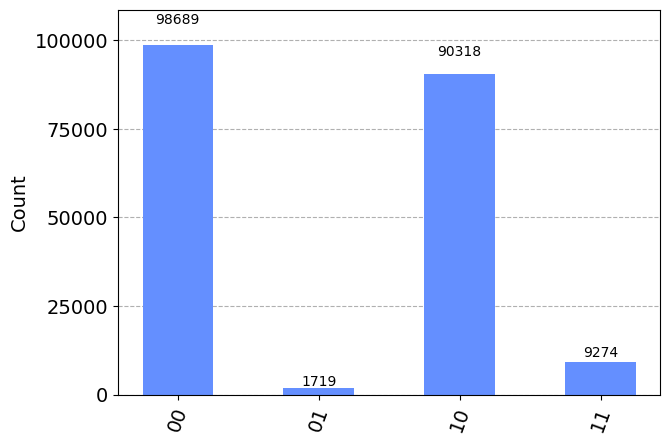

In [ ]:
plot_histogram(counts_ionq)

In [ ]:
qc.draw('mpl')

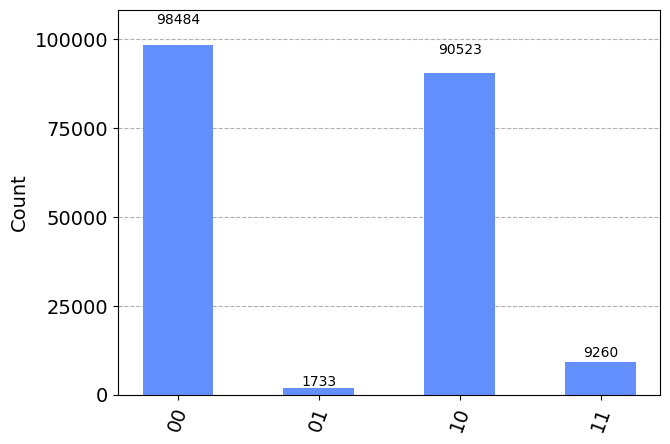

In [26]:
plot_histogram(counts)

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


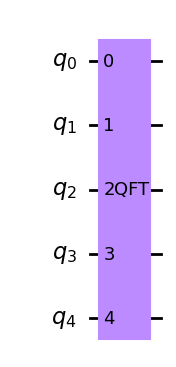

In [3]:
from qiskit.circuit.library import QFT

qft = QFT(5)
qft.draw('mpl')